# Probabilistic Analysis of Ventures

Consider a portfolio of 'n' business ventures with varying capital investments C1,C2, ..., Cn, that mature after the same period of time, and have probability distributions of returns P1(r), P2(r), ..., Pn(r) where -1 <= r < Infinity (a return of -1 implies a complete loss of investment, without additional loss to the portfolio). Let rc1, rc2, ..., rcn be the returns that are needed for the various ventures to individually result in breakeven of the entire portfolio even if all the remaining ventures return -1.

Let 'p' be an arbitrary number such that P1(rc1), P2(rc2), ..., Pn(rcn) >= p and 'Pa' be the probability of at least 1 success (defined as at least 1 venture resulting in breakeven) in the portfolio. Furthermore, let 'Pb' be probability of at least 1 success when P1(rc1) = P2(rc2) = ... = Pn(rcn) = p. Since, 'Pa >= Pb', an analysis of the latter case yields a lower limit for the value of p.

The following code determines how the probability of at least 1 success varies with (i) the number of ventures, and (ii) the probability of success of each venture.

## 1 Variation in probability of at least 1 success with the number of ventures

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Defining a function to calculate the probability of at least 1 success, given n ventures, each with probability of success p
def prob(p,n):
    p_prime = 0
    for i in np.arange(n):
        p_prime = p+p_prime-p*p_prime
    return p_prime

prob = np.vectorize(prob)

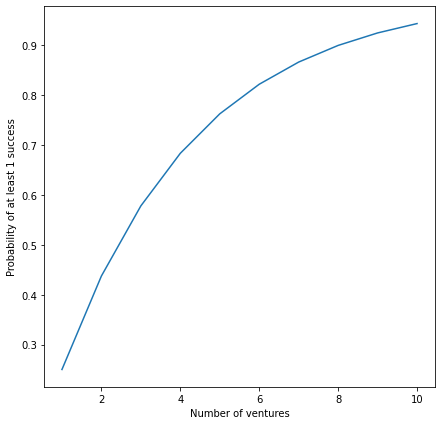

In [3]:
# Plotting the joint probability of success of at least one venture against the number of ventures for p = 0.25, where p is selected arbitrarily
x = np.arange(1,11).reshape((10,1))
y = prob(0.25,x)

fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.plot(x,y)
ax.set_xlabel('Number of ventures')
ax.set_ylabel('Probability of at least 1 success')
fig.show()

## 2 Variation in the probability of at least 1 success with the probability of success of each venture

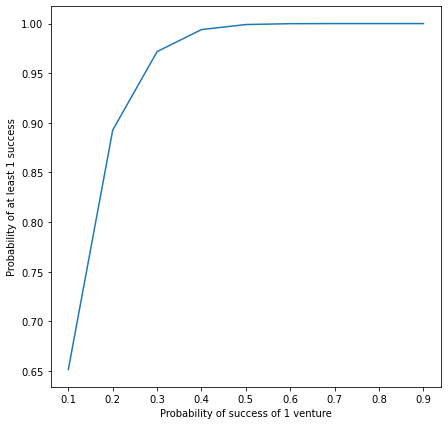

In [4]:
# Plotting the probability of success of at least one venture for n = 10, where n is selected arbitrarily
x = 0.1*np.arange(1,10).reshape((9,1))
y = prob(x,10)

fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.plot(x,y)
ax.set_xlabel('Probability of success of 1 venture')
ax.set_ylabel('Probability of at least 1 success')
fig.show()

## 3 Variation in the probability of at least 1 success with both variables, p and n

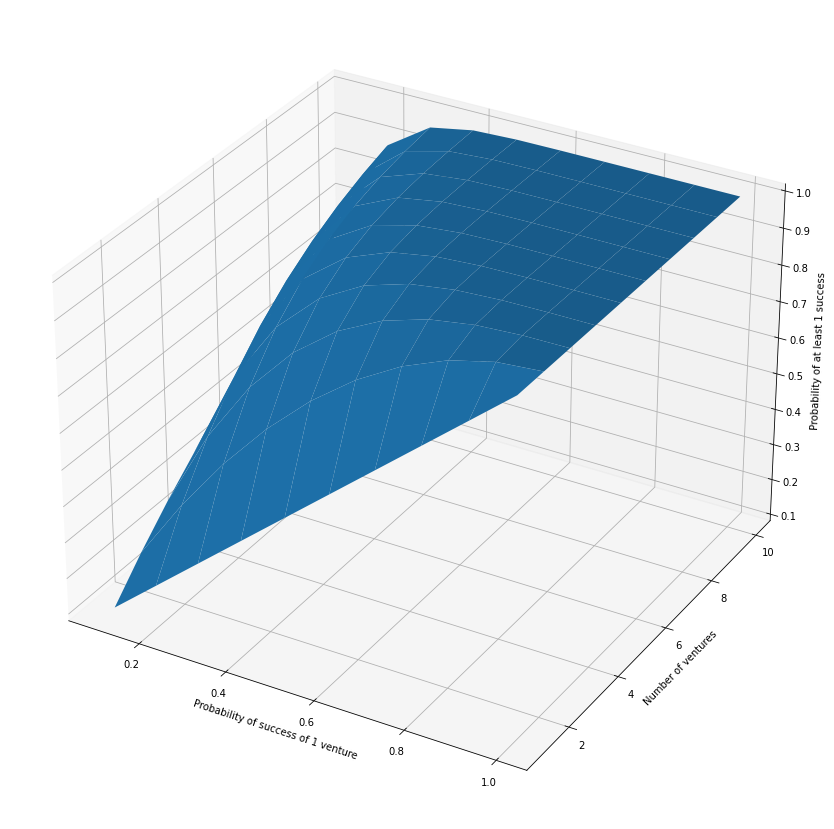

In [5]:
# Plotting a 3D surface
p = 0.1*np.arange(1,11).reshape((10,1))
n = np.arange(1,11).reshape((10,1))
X, Y = np.meshgrid(p, n)
Z = prob(X,Y)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_ylabel('Number of ventures')
ax.set_xlabel('Probability of success of 1 venture')
ax.set_zlabel('Probability of at least 1 success')
fig.show()

In [6]:
# Finding combinations of p and n for which the joint probability is greater than or equal to 0.95
import pandas as pd

In [7]:
df = pd.DataFrame({'p':X.flatten(),'n':Y.flatten(),'P':Z.flatten()})
df

,p,n,P
0,0.1,1,0.100000
1,0.2,1,0.200000
2,0.3,1,0.300000
3,0.4,1,0.400000
4,0.5,1,0.500000
...,...,...,...
95,0.6,10,0.999895
96,0.7,10,0.999994
97,0.8,10,1.000000
98,0.9,10,1.000000


In [8]:
df[df['P']>=0.95].sort_values(by='P').head(20)

,p,n,P
53,0.4,6,0.953344
82,0.3,9,0.959646
17,0.8,2,0.960000
44,0.5,5,0.968750
92,0.3,10,0.971752
63,0.4,7,0.972006
26,0.7,3,0.973000
35,0.6,4,0.974400
73,0.4,8,0.983204
54,0.5,6,0.984375


## 4 Insights

The above is a simplified mathematical model of the probability of success of business ventures and while the exact numbers will vary in practice, the framework is sound and yields many practical insights.
1. As shown in the above table, each venture should have a probability of success of at least 0.3 for the portfolio to have a breakeven probability greater than 0.95. Higher probability of success of individual ventures is undoubtedly better, but the benefits diminish after 0.4 or 0.5. Thus, it's essential to select ambitious ventures that have a high chance of saving the portfolio should all others fail.
2. Furthermore, the probability of portfolio breakeven increases with the number of ventures. This implies that all of the capital should never be invested in a single venture and there should be 5-9 active ventures at any given time.
3. The goal of analysing a venture is only to increase the probability of its success and not to assure success, the latter being virtually impossible in practice. Portfolio success is realised by being invested in multiple, ambitious ventures and not by increasing the probability of success of individual ventures with extensive analysis.